In [6]:
from astropy.io import fits
#fits_image_filename = astropy.io.fits.open('../C1_lc.fits')
import scipy.optimize as op
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
pd.set_option("display.precision", 12)
import sys
np.set_printoptions(threshold=sys.maxsize)
import time as timer
import math 


In [7]:
with fits.open('../../C1_lc.fits') as hdul:
    print(hdul[1].columns)
    print(hdul[1].data['COADD_OBJECT_ID'][0])

ColDefs(
    name = 'COADD_OBJECT_ID'; format = 'J'
    name = 'RA'; format = 'E'
    name = 'DEC'; format = 'E'
    name = 'MAGERR_AUTO_G'; format = 'E'
    name = 'MAGERR_AUTO_R'; format = 'E'
    name = 'MAGERR_AUTO_I'; format = 'E'
    name = 'MAGERR_AUTO_Z'; format = 'E'
    name = 'MAGERR_AUTO_Y'; format = 'E'
    name = 'MAGERR_DETMODEL_G'; format = 'E'
    name = 'MAGERR_DETMODEL_R'; format = 'E'
    name = 'MAGERR_DETMODEL_I'; format = 'E'
    name = 'MAGERR_DETMODEL_Z'; format = 'E'
    name = 'MAGERR_DETMODEL_Y'; format = 'E'
    name = 'MAG_AUTO_G'; format = 'E'
    name = 'MAG_AUTO_R'; format = 'E'
    name = 'MAG_AUTO_I'; format = 'E'
    name = 'MAG_AUTO_Z'; format = 'E'
    name = 'MAG_AUTO_Y'; format = 'E'
    name = 'MAG_DETMODEL_G'; format = 'E'
    name = 'MAG_DETMODEL_R'; format = 'E'
    name = 'MAG_DETMODEL_I'; format = 'E'
    name = 'MAG_DETMODEL_Z'; format = 'E'
    name = 'MAG_DETMODEL_Y'; format = 'E'
    name = 'SPREAD_MODEL_G'; format = 'E'
    name = 'SPR

121658
C1


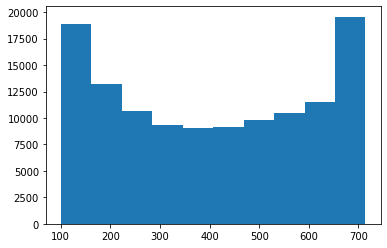

In [26]:
#Need to make this more generalized.
num_obs_list = []
for x in ['../../C1_lc.fits']: #, '../../C2_lc.fits', '../../C3_lc.fits',
          #'../../E1_lc.fits', '../../E2_lc.fits',
          #'../../S1_lc.fits', '../../S2_lc.fits',
          #'../../X1_lc.fits', '../../X2_lc.fits', '../../X3_lc.fits']:
    with fits.open(x) as hdul:
        #print(hdul[1].columns)
        print(hdul[1].data.shape[0])
        print((x.split("/")[-1]).split("_")[0])
        lab=(x.split("/")[-1]).split("_")[0]


        C1_noise_G = []
        C1_noise_R = []
        C1_noise_I = []
        C1_noise_Z = []
        C1_mag_G = []
        C1_mag_R = []
        C1_mag_I = []
        C1_mag_Z = []
        C1_dur = []
        num_obs = []
        for i in range(0, hdul[1].data.shape[0]):
            C1_noise_G.append(np.mean(hdul[1].data['LC_FLUXERR_PSF_G'][i]))
            C1_noise_R.append(np.mean(hdul[1].data['LC_FLUXERR_PSF_R'][i]))
            C1_noise_I.append(np.mean(hdul[1].data['LC_FLUXERR_PSF_I'][i]))
            C1_noise_Z.append(np.mean(hdul[1].data['LC_FLUXERR_PSF_Z'][i]))
            times = np.array(hdul[1].data['LC_MJD_G'][i])
            C1_mag_G.append(hdul[1].data['MAG_AUTO_G'][i]) 
            C1_mag_R.append(hdul[1].data['MAG_AUTO_R'][i])
            C1_mag_I.append(hdul[1].data['MAG_AUTO_I'][i]) 
            C1_mag_Z.append(hdul[1].data['MAG_AUTO_Z'][i]) 
            for j in 'RIZ':
                #noise = np.concatenate((noise, np.array(hdul[1].data['LC_FLUXERR_PSF_'+str(j)][i])))
                times = np.concatenate((times, np.array(hdul[1].data['LC_MJD_'+str(j)][i])))
            time_dur = times[times!=0]
            #print(time_dur)
            #print(len(time_dur))
            num_obs.append(len(time_dur))
            #print(num_obs)
            #C1_noise.append(np.mean(noise))
            C1_dur.append(np.max(time_dur)-np.min(time_dur))
        #max_rows = hdul[1].data.shape[0]
        
        
    num_obs_list.append(num_obs)
#print(num_obs_list.median())
#df_describe = pd.DataFrame(num_obs_list)
#print(df_describe.describe())
plt.hist(num_obs_list, label=lab)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=[9,5])

g = sns.violinplot(ax=ax, data=num_obs_list)
g.set(xticklabels=['C1', 'C2', 'C3', 'E1', 'E2', 'S1','S2', 'X1', 'X2', 'X3'])
g.set_xlabel("DES-SN Field", fontsize=15)
g.set_ylabel('Number of Observations', fontsize=15)

#g.set(yscale='log')
plt.savefig("num_obs_dist.png", dpi=200)
plt.show()

In [28]:
    C1_noise_G = np.array(C1_noise_G)
    C1_noise_R = np.array(C1_noise_R)
    C1_noise_I = np.array(C1_noise_I)
    C1_noise_Z = np.array(C1_noise_Z)
    C1_dur = np.array(C1_dur)
    C1_mag_G = np.array(C1_mag_G)
    C1_mag_R = np.array(C1_mag_R)
    C1_mag_I = np.array(C1_mag_I)
    C1_mag_Z = np.array(C1_mag_Z)
    C1_dur = C1_dur[C1_dur != 0 ]
    C1_mag_G = C1_mag_G[C1_mag_G < 99.0]
    C1_mag_R = C1_mag_R[C1_mag_R < 99.0]
    print("G noise")
    print(np.median(C1_noise_G))
    print(np.min(C1_noise_G[np.nonzero(C1_noise_G)]))
    print(np.max(C1_noise_G))
    print(np.mean(C1_noise_G))
    print("R noise")
    print(np.median(C1_noise_R))
    print(np.min(C1_noise_R[np.nonzero(C1_noise_R)]))
    print(np.max(C1_noise_R))
    print(np.mean(C1_noise_R))
    print("I noise")
    print(np.median(C1_noise_I))
    print(np.min(C1_noise_I[np.nonzero(C1_noise_I)]))
    print(np.max(C1_noise_I))
    print(np.mean(C1_noise_I))
    print("Z noise")
    print(np.median(C1_noise_Z))
    print(np.min(C1_noise_Z[np.nonzero(C1_noise_Z)]))
    print(np.max(C1_noise_Z))
    print(np.mean(C1_noise_Z))
    
    print("Duration")
    print(np.median(C1_dur))
    print(np.min(C1_dur))
    print(np.max(C1_dur))
    print(np.mean(C1_dur))  
    print("Number of Observations")
    print(np.max(num_obs))
    print(np.argmax(num_obs))
    print(np.min(num_obs))
    print(np.where(num_obs ==np.min(num_obs)))
    print(np.median(num_obs))
    print(np.where(num_obs==np.median(num_obs)))
    print(np.mean(num_obs))
    print("Mag G")
    print(np.median(C1_mag_G))
    print(np.min(C1_mag_G))
    print(np.max(C1_mag_G))
    print(np.mean(C1_mag_G))
    print("Mag R")
    print(np.median(C1_mag_R))
    print(np.min(C1_mag_R))
    print(np.max(C1_mag_R))
    print(np.mean(C1_mag_R))
    print("Mag I")
    print(np.median(C1_mag_I))
    print(np.min(C1_mag_I))
    print(np.max(C1_mag_I))
    print(np.mean(C1_mag_I))
    print("Mag Z")
    print(np.median(C1_mag_Z))
    print(np.min(C1_mag_Z))
    print(np.max(C1_mag_Z))
    print(np.mean(C1_mag_Z))
    

G noise
0.0156090055
2.84e-43
1.2267679e+21
1.3144622e+16
R noise
0.03235022
0.00017271629
7.710559e+18
63378970000000.0
I noise
0.054595865
0.00036245273
0.6933125
0.056418445
Z noise
0.076100275
0.00021387434
1.1760977e+19
96672450000000.0
Duration
1629.8047
1490.0
1629.8125
1627.041
Number of Observations
714
173
101
(array([   274,   1924,   2325,   2412,   2622,   3167,   3512,   4150,
         4533,   5022,   6043,   6384,   6593,   6861,   8180,   8391,
         8480,   8696,   9223,   9232,   9344,   9476,   9573,   9680,
        10335,  10511,  10683,  10805,  10880,  11050,  11560,  12107,
        14136,  14188,  14866,  15129,  16002,  16438,  16455,  16799,
        17030,  18231,  18269,  18454,  18515,  19206,  19423,  19501,
        19583,  20243,  20644,  20842,  21088,  21141,  21256,  21471,
        21659,  21938,  22335,  23258,  23588,  23910,  23946,  24238,
        24940,  25337,  25550,  25557,  25775,  25853,  26050,  26204,
        26671,  26958,  27337,  27532,

In [11]:
with fits.open('../../X3_lc.fits') as hdul:
    print(hdul[1].columns)
    print(hdul[1].data.shape)
    print(hdul[1].data['NXS_AUTO_R'][0])

ColDefs(
    name = 'COADD_OBJECT_ID'; format = 'J'
    name = 'RA'; format = 'E'
    name = 'DEC'; format = 'E'
    name = 'MAGERR_AUTO_G'; format = 'E'
    name = 'MAGERR_AUTO_R'; format = 'E'
    name = 'MAGERR_AUTO_I'; format = 'E'
    name = 'MAGERR_AUTO_Z'; format = 'E'
    name = 'MAGERR_AUTO_Y'; format = 'E'
    name = 'MAGERR_DETMODEL_G'; format = 'E'
    name = 'MAGERR_DETMODEL_R'; format = 'E'
    name = 'MAGERR_DETMODEL_I'; format = 'E'
    name = 'MAGERR_DETMODEL_Z'; format = 'E'
    name = 'MAGERR_DETMODEL_Y'; format = 'E'
    name = 'MAG_AUTO_G'; format = 'E'
    name = 'MAG_AUTO_R'; format = 'E'
    name = 'MAG_AUTO_I'; format = 'E'
    name = 'MAG_AUTO_Z'; format = 'E'
    name = 'MAG_AUTO_Y'; format = 'E'
    name = 'MAG_DETMODEL_G'; format = 'E'
    name = 'MAG_DETMODEL_R'; format = 'E'
    name = 'MAG_DETMODEL_I'; format = 'E'
    name = 'MAG_DETMODEL_Z'; format = 'E'
    name = 'MAG_DETMODEL_Y'; format = 'E'
    name = 'SPREAD_MODEL_G'; format = 'E'
    name = 'SPR

In [12]:
with fits.open('../../SNobs_MJD.fits') as hdul:
    print(hdul[1].columns)
    print(hdul[1].data.shape)
    print(hdul[1].data[0])
    
    df = pd.DataFrame(hdul[1].data)
    print(df[0:10])
    #print(df.query('BAND == "i" and FIELD == "SN-C1" and abs(MJD_SNGL - 56543.3125)<=0.02'))

    print(df["MJD_OBS"][(df["BAND"] == 'z') & (df["FIELD"] == "SN-C1") & (abs(df["MJD_SNGL"] - 56653.09375000)<=0.02)])

ColDefs(
    name = 'EXPNUM'; format = 'K'
    name = 'BAND'; format = '5A'
    name = 'FIELD'; format = '20A'
    name = 'MJD_OBS'; format = 'D'
    name = 'MJD_SNGL'; format = 'D'
)
(15263,)
(141154, 'g', 'SN-X1', 56222.21044722, 56222.2109375)
   EXPNUM BAND  FIELD             MJD_OBS        MJD_SNGL
0  141154    g  SN-X1  56222.210447220001  56222.21093750
1  141156    r  SN-X1  56222.216881319997  56222.21875000
2  141157    g  SN-X2  56222.219071749998  56222.21875000
3  141158    r  SN-X2  56222.221455330000  56222.22265625
4  141159    i  SN-X2  56222.223546620000  56222.22265625
5  141160    z  SN-X2  56222.226216269999  56222.22656250
6  141161    z  SN-X2  56222.228894810003  56222.23046875
7  141162    g  SN-X1  56222.231587930000  56222.23046875
8  141163    r  SN-X1  56222.233960680001  56222.23437500
9  141164    i  SN-X1  56222.236069890001  56222.23437500
3072    56653.092888040002
3073    56653.095523750002
Name: MJD_OBS, dtype: float64


In [31]:
#Making CSV file for BlueWaters LSST/DES run

fit_str = "C1"

with fits.open('../../'+fit_str+'_lc.fits') as hdul:
    with fits.open('../../SNobs_MJD.fits') as dat:
 
        df_time = pd.DataFrame(dat[1].data)
    
        print(fit_str)
        num_reps = 0
        noise_dict = {'G':2.3, 'R':2.1, 'I':2.2,'Z':1.8}
        row = [    18,    663,   2069,   2366,   3742,   3835,   4244,   4264,
             4452,   6583,   6794,   7691,   8937,   9766,  10229,  10716,
            10950,  11646,  11691,  11785,  12664,  13691,  13836,  16607,
            18316,  18426,  18627,  20768,  20823,  21258,  21630,  23893,
            24020,  24264,  24837,  25306,  25465,  26739,  27911,  28331,
            28629,  29341,  30005,  30402,  30503,  32331,  34520,  35309,
            35576,  35828,  36084,  36619,  37531,  37752,  37933,  39296,
            40582,  41817,  44018,  44027,  44242,  44478,  44669,  45193,
            46221,  46749,  47076,  47166,  47717,  48804,  50154,  50165,
            50241,  51549,  52230,  52397,  52429,  52752,  54682,  54830,
            55093,  57227,  57569,  62392,  62545,  64739,  65811,  66334,
            66350,  67400,  67979,  68472,  69373,  69868,  70834,  72895,
            73664,  73672,  74233,  74744,  77706,  78216,  78305,  78371,
            78822,  82008,  82305,  82895,  84246,  84851,  86214,  86947,
            87727,  88259,  88585,  88840,  89310,  90022,  90680,  90908,
            90957,  91051,  93240,  95292,  97188,  98208,  98252,  98485,
            99628, 101012, 101349, 101756, 102190, 104307, 104366, 106135,
            107611, 108271, 111739, 111822, 112387, 112603, 113993, 114659,
            114715, 115110, 115117, 116317, 116385, 118281, 120843]
            #[173] #[308,  602,  1068,  1466,  3039,  3165,  3437,  5030,  5721,
            #6343,  7199,  8596,  8908,  9254, 10492, 12168, 12377, 13233,
           #14770, 14986, 15074, 16711, 19147, 20166, 20334, 20766, 22629,
           #22754, 22888, 22913, 23014, 23594, 24513, 25136, 25526, 25792,
           #25872, 26044, 26419, 26704, 26740, 27570, 28294, 30638, 30960,
           #31105, 32374, 32688, 32887, 33284, 33713, 34329, 34483, 34763,
           #34828, 36528, 37489, 39827, 39938, 40193, 40318, 41044, 41520,
           #43616, 43810, 43963, 44446, 47401, 47932, 48461, 49044, 49597,
           #50772, 51814, 54762, 54913, 55362, 55399, 56259, 56547, 56925,
           #58155, 58198, 60882, 62431, 62846, 63118, 63236, 63930, 64296,
           #64767, 65603, 65990, 67482, 67768, 69287, 69867]
        tick = timer.perf_counter()
        for i in range(274, 275): #int(hdul[1].data.shape[0]/2)): (0, 500)
            time = np.array([])
            filt = np.array([])
            field = np.array([])
            noise = np.array([])
            flux = np.array([])
            for color in 'GRIZ':
                filt_time = np.array(hdul[1].data['LC_MJD_'+str(color)][i].astype("float64")) 
                filt_mag = np.array(hdul[1].data["LC_FLUX_PSF_"+str(color)][i].astype("float64"))
                #print(filt_time[0:10]*256)
                #print(hdul[1].data["COADD_OBJECT_ID"][i])
                #print(hdul[1].data["RA"][i])
                #print(hdul[1].data["DEC"][i])

                filter_time = filt_time[filt_time!=0]
                filter_mag = filt_mag[filt_time!=0]

                time = np.concatenate((time, filter_time))
                noise = np.concatenate((noise, [noise_dict[color]*0.001 for k in range(len(filter_time))]))
                field = np.concatenate((field, [i for k in range(len(filter_time))]))
                filt = np.concatenate((filt, [color.lower() for k in range(len(filter_time))]))
                flux = np.concatenate((flux, filter_mag))
                print("Obs number:" +str(len(time)))


            df = pd.DataFrame({
                'filter': filt,
                'time': time,
                'field': field,
                'noise': noise, 
                "flux": flux
            })
            df_sort = df.sort_values(by=['time'])
            print(df_sort.dtypes)

            times = df_sort["time"]
            repeats = df_sort[times.isin(times[times.duplicated()])].sort_values("time")
            df_unique = df_sort.drop_duplicates(["time"], False)
            repeats_bool = times.isin(times[times.duplicated()])
            three_peat = 0
            
            repeats_dict = repeats.groupby('time').apply(lambda dfg: dfg.to_dict(orient='list')).to_dict()
            #print(repeats_dict[56888.28515625]["filter"])
            print(repeats_dict)
            #break
        
            if len(repeats.index)>=2:
                print(i)
                print("Two or more repeated rows!")
                print(len(df_sort))
                print("repeating in "+ str(len(repeats.index)) + " rows")
                if len(repeats.index)%2 ==1:
                    print("Odd number of repeats!")
                
                

                #print(repeats.to_string())
                row_count = 0
                for idx, row in repeats.iterrows():
                    print(row)
                    row_count +=1
                    
                    
                    print(repeats_bool.loc[idx], repeats.loc[idx, "filter"], repeats.loc[idx, "time"])
                    df_repl = df_time["MJD_OBS"][(df_time["BAND"] == repeats.loc[idx,"filter"]) & (df_time["FIELD"] == "SN-"+fit_str) & (df_time["MJD_SNGL"] == repeats.loc[idx, "time"])]
                    df_replace = np.array(df_repl)
                    
                    
                    #TODO: check to see if there are any triplicates or more, maybe with a dictionary? 
                    #TODO: (cont) have key be time, values be filter. Look up repeats in the dict
                    #TODO: (cont) If the filter is repeated 3 times, then shenanigans ensue, 
                    #TODO: (cont) otherwise, proceed as below with the if elif and don't invoke the else
                    
                    
                    print("df_replace    :"+str(df_replace))
                    print(df_replace.shape[0])
                    print(df_replace)
                    if df_replace.shape[0] == 1: #just one choice for the replacing time in that filter
                        repeats.loc[idx, "time"] = df_replace[0]  #.iloc[[0]] #you just replace it, easy
                        
                    elif df_replace.shape[0] == 2: #more than one option on repeated times for the filter
                        print(row_count)
                        if row_count%2==0: #if we are in the second of the two pairs of matching times
                            if repeats.loc[idx, "filter"] == prev_filter: #if the filter matches the previous filter, choose the second time
                                repeats.loc[idx, "time"] = df_replace[1]
                                print("second replace")
                            else: #if the filter doesn't match the previous filter, just choose the first time
                                repeats.loc[idx, "time"] = df_replace[0]
                        else: #we are on the first of the two pairs of matching times, choose the first time
                            repeats.loc[idx, "time"] = df_replace[0]
                            print("first replace")
                            
                    elif df_replace.shape[0] >=3:
                        if len(repeats_dict[repeats.loc[idx, "time"]]["filter"]) <= 2: #use len(set to find unique number
                            # JUST REPLACE THE TWO CASES AS BEST YOU CAN AND 
                            # REPLACE WITH THE FIRST TWO CASES IN DF_REPLACE
                            if row_count%2==0: #if we are in the second of the two pairs of matching times
                                if repeats.loc[idx, "filter"] == prev_filter: #if the filter matches the previous filter, choose the second time
                                    repeats.loc[idx, "time"] = df_replace[1]
                                else: #if the filter doesn't match the previous filter, just choose the first time
                                    repeats.loc[idx, "time"] = df_replace[0]
                            else: #we are on the first of the two pairs of matching times, choose the first time
                                repeats.loc[idx, "time"] = df_replace[0]
                            
    
                        
                        elif len(repeats_dict[repeats.loc[idx, "time"]]["filter"]) >2: #3 repeated filters  
                            print("Three repeated filters!!")
                            print(repeats_dict)
                            if len(set(repeats_dict[repeats.loc[idx, "time"]]["filter"])) ==1:
                                repeats.loc[idx, "time"] = df_replace[three_peat]
                                three_peat+=1
                                if three_peat ==3:
                                    three_peat =0
                                    row_count = math.ceil(f / 2.) * 2
                            else:
                                print("Three repeat obs in 2 filters")
                                break
                                #if row_count%2==0: #if we are in the second of the two pairs of matching times
                                #    if repeats.loc[idx, "filter"] == prev_filter: #if the filter matches the previous filter, choose the second time
                                #        repeats.loc[idx, "time"] = df_replace[1]
                                #    else: #if the filter doesn't match the previous filter, just choose the first time
                                #        repeats.loc[idx, "time"] = df_replace[0]
                                #else: #we are on the first of the two pairs of matching times, choose the first time
                                #    repeats.loc[idx, "time"] = df_replace[0]
                        
                            
                    ### WORK IN PROGRESS
                    prev_filter = repeats.loc[idx, "filter"]        
            result = pd.concat([df_unique, repeats])   
            result_sort = result.sort_values(by=['time'])
            result_sort = result_sort.drop_duplicates(subset=['time'])
            
            #Check to see if it's actually fixed (modify next two lines)
            time_res = result_sort["time"]
            repeat_res = result_sort[time_res.isin(time_res[time_res.duplicated()])].sort_values("time")
            
            if not repeat_res.empty:
                print("Repeat result:    "+repeat_res.to_string())
                print(i)
                print(repeats_dict)
                
            #print(result_sort.to_string())
            filter = result_sort["filter"].to_numpy()
            time = result_sort["time"].to_numpy()
            err_norm = result_sort["noise"].to_numpy()
            flux_norm = result_sort["flux"].to_numpy()
            
            print("Finished arrays")
            print(len(filter))
            print(len(time))
            print(len(err_norm))
            print(len(flux_norm))
            result_sort.to_csv('DES_ObsHistory_274row_c1field.csv')
        print(hdul[1].data.shape[0])
        tock = timer.perf_counter()
        print(tock-tick)

C1
Obs number:5
Obs number:50
Obs number:81
Obs number:101
filter     object
time      float64
field     float64
noise     float64
flux      float64
dtype: object
{56602.12109375: {'filter': ['r', 'i'], 'time': [56602.12109375, 56602.12109375], 'field': [274.0, 274.0], 'noise': [0.0021000000000000003, 0.0022], 'flux': [0.14222612977027893, 0.34884193539619446]}, 56927.23828125: {'filter': ['r', 'i'], 'time': [56927.23828125, 56927.23828125], 'field': [274.0, 274.0], 'noise': [0.0021000000000000003, 0.0022], 'flux': [0.25450780987739563, 0.36510396003723145]}, 56973.3203125: {'filter': ['i', 'z'], 'time': [56973.3203125, 56973.3203125], 'field': [274.0, 274.0], 'noise': [0.0022, 0.0018000000000000002], 'flux': [0.3920391798019409, 0.0]}, 56980.3203125: {'filter': ['r', 'i'], 'time': [56980.3203125, 56980.3203125], 'field': [274.0, 274.0], 'noise': [0.0021000000000000003, 0.0022], 'flux': [0.22076360881328583, 0.2996634244918823]}, 57012.0859375: {'filter': ['r', 'i'], 'time': [57012.085

In [ ]:
#C3 Row 7 diagnostic
row = 7
with fits.open('../../C3_lc.fits') as hdul:
    rowtime = []
    rowflux =[]
    rownoise =[]
    
    for letter in "GRIZ":
        rowtime.append(np.array(hdul[1].data['LC_MJD_'+letter][row]))
        rowflux.append(hdul[1].data['LC_FLUX_PSF_'+letter][row])
        rownoise.append(hdul[1].data['LC_FLUXERR_PSF_'+letter][row])
        
    print(rowtime)
    #print(rowflux)
    #print(rownoise)
        
    print(np.count_nonzero(np.isnan(rowtime)))
    print(np.count_nonzero(np.isnan(rowflux)))
    print(np.count_nonzero(np.isnan(rownoise)))

In [ ]:
    
with fits.open('../../C3_lc.fits') as hdul:
    #print(hdul[1].columns)
    #print(hdul[1].data.shape[0])
    print("C3")
    C3_noise = []
    C3_dur = []
    for i in range(0, 10000):
        C3_noise.append(np.mean(hdul[1].data['LC_FLUXERR_PSF_G'][i]))
        times = hdul[1].data['LC_MJD_G'][i]
        C3_dur.append(np.max(times)-np.min(times))
    #max_rows = hdul[1].data.shape[0]
    C3_noise = np.array(C3_noise)
    C3_dur = np.nonzero(np.array(C3_dur))
    print(np.median(C3_noise))
    print(np.min(C3_noise[np.nonzero(C3_noise)]))
    print(np.max(C3_noise))
    print(np.mean(C3_noise))
    print("Duration")
    print(np.median(C3_dur))
    print(np.min(C3_dur))
    print(np.max(C3_dur))
    print(np.mean(C3_dur))
    
    
    
with fits.open('../../E1_lc.fits') as hduls:
    print("E1")
    E1_noise = []
    for i in range(0, 10000):
        E1_noise.append(np.mean(hduls[1].data['LC_FLUXERR_PSF_G'][i]))
    E1_noise = np.array(E1_noise)
    print(np.median(E1_noise))
    print(np.min(E1_noise[np.nonzero(E1_noise)]))
    print(np.max(E1_noise))
    print(np.mean(E1_noise))
    
with fits.open('../../S1_lc.fits') as hduls:
    print("S1")
    S1_noise = []
    for i in range(0, 10000):
        S1_noise.append(np.mean(hduls[1].data['LC_FLUXERR_PSF_G'][i]))
    S1_noise = np.array(S1_noise)
    print(np.median(S1_noise))
    print(np.min(S1_noise[np.nonzero(S1_noise)]))
    print(np.max(S1_noise))
    print(np.mean(S1_noise))

with fits.open('../../S2_lc.fits') as hduls:
    print("S2")
    S2_noise = []
    for i in range(0, 10000):
        S2_noise.append(np.mean(hduls[1].data['LC_FLUXERR_PSF_G'][i]))
    S2_noise = np.array(S2_noise)
    print(np.median(S2_noise))
    print(np.min(S2_noise[np.nonzero(S2_noise)]))
    print(np.max(S2_noise))
    print(np.mean(S2_noise))
    
with fits.open('../../X1_lc.fits') as hdulx:
    print("X1")
    X1_noise = []
    for i in range(0, 10000):
        X1_noise.append(np.mean(hdulx[1].data['LC_FLUXERR_PSF_G'][i]))
    X1_noise = np.array(X1_noise)
    print(np.median(X1_noise))
    print(np.min(X1_noise[np.nonzero(X1_noise)]))
    print(np.max(X1_noise))
    print(np.mean(X1_noise))
    
    n, bins, patches = plt.hist(X1_noise, 50, density=True, facecolor='b', alpha=0.75)
    
with fits.open('../../X2_lc.fits') as hdulx:
    print("X2")
    X2_noise = []
    for i in range(0, 1000):
        X2_noise.append(np.mean(hdulx[1].data['LC_FLUXERR_PSF_G'][i]))
    X2_noise = np.array(X2_noise)
    print(np.median(X2_noise))
    print(np.min(X2_noise[np.nonzero(X2_noise)]))
    print(np.max(X2_noise))
    print(np.mean(X2_noise))
    

In [ ]:
#Min and max dates
FITS = pyfit.open(r'../../C1_lc.fits')
lc_time_arr = FITS[1].data['LC_MJD_G']
lc_time_dur = (np.max(lc_time_arr[lc_time_arr != 0]) - np.min(lc_time_arr[lc_time_arr != 0]))/365
print("C1:  "+ str(lc_time_dur))

FITS = pyfit.open(r'../../C2_lc.fits')
lc_time_arr = FITS[1].data['LC_MJD_G']
lc_time_dur = (np.max(lc_time_arr[lc_time_arr != 0]) - np.min(lc_time_arr[lc_time_arr != 0]))/365
print("C2:  "+ str(lc_time_dur))

FITS = pyfit.open(r'../../E1_lc.fits')
lc_time_arr = FITS[1].data['LC_MJD_G']
lc_time_dur = (np.max(lc_time_arr[lc_time_arr != 0]) - np.min(lc_time_arr[lc_time_arr != 0]))/365
print("E1:  "+ str(lc_time_dur))

FITS = pyfit.open(r'../../E2_lc.fits')
lc_time_arr = FITS[1].data['LC_MJD_G']
lc_time_dur = (np.max(lc_time_arr[lc_time_arr != 0]) - np.min(lc_time_arr[lc_time_arr != 0]))/365
print("E2:  "+ str(lc_time_dur))

FITS = pyfit.open(r'../../S1_lc.fits')
lc_time_arr = FITS[1].data['LC_MJD_G']
lc_time_dur = (np.max(lc_time_arr[lc_time_arr != 0]) - np.min(lc_time_arr[lc_time_arr != 0]))/365
print("S1:  "+ str(lc_time_dur))

FITS = pyfit.open(r'../../S2_lc.fits')
lc_time_arr = FITS[1].data['LC_MJD_G']
lc_time_dur = (np.max(lc_time_arr[lc_time_arr != 0]) - np.min(lc_time_arr[lc_time_arr != 0]))/365
print("S2:  "+ str(lc_time_dur))

FITS = pyfit.open(r'../../X1_lc.fits')
lc_time_arr = FITS[1].data['LC_MJD_G']
lc_time_dur = (np.max(lc_time_arr[lc_time_arr != 0]) - np.min(lc_time_arr[lc_time_arr != 0]))/365
print("X1:  "+ str(lc_time_dur))

FITS = pyfit.open(r'../../X2_lc.fits')
lc_time_arr = FITS[1].data['LC_MJD_G']
lc_time_dur = (np.max(lc_time_arr[lc_time_arr != 0]) - np.min(lc_time_arr[lc_time_arr != 0]))/365
print("X2:  "+ str(lc_time_dur))

In [ ]:
bins = np.linspace(0,1.1, 1100)
noise = [C1_noise, E1_noise, S1_noise, S2_noise, X1_noise, X2_noise] 

g = sns.violinplot(data=noise)
g.set(xticklabels=['C1', 'E1', 'S1','S2', 'X1', 'X2'])
g.set(xlabel='Fits', ylabel='noise range')
g.set(yscale='log')

In [ ]:
bins = np.linspace(0,1.1, 1100)
noise = [C1_noise, E1_noise, S1_noise, S2_noise, X2_noise] 

g = sns.violinplot(data=noise)
g.set(xticklabels=['C1', 'E1', 'S1','S2', 'X2'])
g.set(xlabel='Fits', ylabel='noise range')
g.set(yscale='log')
fig = g.get_figure()
fig.savefig("file_error_dists.png")

In [ ]:
%matplotlib inline 
import astropy.io.fits as pyfit
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import stats

FITS = pyfit.open(r'../../C1_lc.fits')

def get_vals(args, ROW):
    color_dict = {"g": 1, "r": 2, "i": 3, "z": 4}
    lc_median = {}
    time = np.array([])
    flux_norm = np.array([])
    err_norm = np.array([])
    array_org = np.array([])
    fig = plt.figure(figsize=(12, 6))
    ax5 = fig.add_subplot(111)
    color_plt = iter(cm.rainbow(np.linspace(0, 1, 5)))
    a_b_list = read_a_b_chi2()
    #print(a_b_list)
    for color in "griz":
        FITS = pyfit.open(args)
        # Obtain flux, err, and time arrays
        try:
            lc_flux = FITS[1].data['LC_FLUX_PSF_'+color][ROW]
        except IndexError:
            print('Error')
            exit()
        
        lc_flux_err = FITS[1].data['LC_FLUXERR_PSF_'+color][ROW]
        lc_time = FITS[1].data['LC_MJD_'+color][ROW]
        limit = len(lc_time[(lc_time != 0)*(lc_flux_err <2)])
        lc_median[color] = FITS[1].data['MEDIAN_PSF_'+color][ROW] #change back to median
        if limit < 3:
            lc_median[color] = 0.0
            #print("Not enough " + color + " observations!")
            continue

        lcur_time = lc_time[(lc_time != 0)*(lc_flux_err <2)]
        lcur_flux = lc_flux[(lc_time != 0)*(lc_flux_err <2)] #:limit 
        lcur_flux_err = lc_flux_err[(lc_time != 0)*(lc_flux_err <2)]  # :limit

        col = next(color_plt)

        mean_err = FITS[1].data['MEANERR_PSF_'+color][ROW]
        
        if (lc_flux_err>2).any():
            mean_err = np.mean(lcur_flux_err)
            
            
        a, b = get_a_b_chi2(args, color, a_b_list)
        #print(a, b)
        #print("OG ERR "+color)
        #print(lc_flux_err)

        flux_err_corr = np.sqrt(np.abs((a**2)*lcur_flux*np.sqrt(np.abs(lcur_flux_err**2 - mean_err**2)) + (b**2)*(lcur_flux_err**2 - mean_err**2)))
        normed_err = flux_err_corr/lc_median[color] #lc_flux_err/lc_median[color] 
        #print("AB CORR ERR "+color)
        #print(flux_err_corr)
        ax5.scatter(lcur_time,
                    (lcur_flux - lc_median[color])/lc_median[color], 
                    label=color, c=np.array([col]))
        ax5.errorbar(lcur_time,
                    (lcur_flux - lc_median[color])/lc_median[color], 
                    yerr=normed_err, ecolor=np.array(col),  
                    linestyle="None")
        
        ax5.legend()
        ax5.set_title("Pre-correction light curve: Row "+ str(ROW))
        ax5.set_ylabel("Median-corrected Flux")
        ax5.set_xlabel("time [MJD]")
        normed_flux = (lcur_flux - lc_median[color])/lc_median[color]

        time = np.append(time, lcur_time)  # remove the zeros
        flux_norm = np.append(flux_norm, normed_flux)
        err_norm = np.append(err_norm, normed_err)
        array_org = np.append(array_org, color_dict[color]*np.ones(limit))
        
    time, flux_norm, err_norm, array_org = map(list,
                                               zip(*sorted(zip(time,
                                                               flux_norm,
                                                               err_norm,
                                                               array_org))))
    return flux_norm, err_norm, time, lc_median, array_org, FITS

def read_a_b_chi2():
    # must have a_b_calc.txt for this to work
    # a_b_calc.txt is made with the following command:
    # python chi_squared_LCs_all_band_data.py > a_b_calc.txt
    a_b_vals = []
    with open("a_b_calc.txt","r") as infile:
        for line in infile:
            #print(line)
            line = line.split('\n')[0]

            field, col, a, b = line.strip('()').split(',')

            a_b_vals.append((field.replace("'", "").strip(), col.replace("'", "").strip(), float(a), float(b)))
    return a_b_vals


def get_a_b_chi2(fit, color, a_b_vals):
    #print(a_b_vals)
    field_name = fit.split("/")[-1].split("_")[0]
    for item in a_b_vals:
        if item[0] == field_name and item[1] == color.upper():
            a, b = item[2], item[3]
            #print(item)
    return a, b

def lin_color_sort(time, color_sort_dict, color_sort):
    int_time = time.astype(int)
    flux_dict = {"g": [], "r": 0, "i": [], "z": []}
    g_flux = []
    i_flux = []
    z_flux = []
    prev_time = int_time[0]
    for i in range(0, len(int_time)):
        if abs(int_time[i] - prev_time) <= 1:
            if color_sort_dict[color_sort[i]] == 'r':
                flux_dict["r"] = flux[i]
            else:
                flux_dict[color_sort_dict[color_sort[i]]].append(flux[i])
        else:
            # record results
            if flux_dict["r"] != 0:
                f_r = flux_dict["r"]
                if len(flux_dict["g"]) != 0:
                    for f_g in flux_dict["g"]:
                        g_flux.append([f_r, f_g])
                if len(flux_dict["i"]) != 0:
                    for f_i in flux_dict["i"]:
                        i_flux.append([f_r, f_i])
                if len(flux_dict["z"]) != 0:
                    for f_z in flux_dict["z"]:
                        z_flux.append([f_r, f_z])
            # start new count
            flux_dict = {"g": [], "r": 0, "i": [], "z": []}
            prev_time = int_time[i]
            if color_sort_dict[color_sort[i]] == 'r':
                flux_dict["r"] = flux[i]
            else:
                flux_dict[color_sort_dict[color_sort[i]]].append(flux[i])
    return g_flux, i_flux, z_flux


In [ ]:
bins = np.linspace(0,1.1, 1100)
noise = X1_noise[X1_noise<2]
print(X1_noise[X1_noise>2])
print(X1_noise.argmax())

n, bins, patches = plt.hist(noise, 50, facecolor='b', alpha=0.75)
plt.ylabel("probability")
plt.xlabel("X1 noise")
plt.show()

g = sns.violinplot(data=noise)
g.set(xticklabels=['X1'])
g.set(xlabel='Fits', ylabel='noise range')
g.set(yscale='log')

flux, err, time, mu, color_sort,  FITS = get_vals(r'/home/sam/Documents/Morganson_research/X1_lc.fits', 7470)
flux, err, time, mu, color_sort,  FITS = get_vals(r'/home/sam/Documents/Morganson_research/X1_lc.fits', 7480)

In [ ]:
flux, err, time, mu, color_sort, FITS = get_vals(r'../../C1_lc.fits', 0)

In [ ]:
flux, err, time, mu, color_sort,  FITS = get_vals(r'/home/sam/Documents/Morganson_research/C1_lc.fits', 8)

In [ ]:
flux, err, time, mu, color_sort,  FITS = get_vals(r'/home/sam/Documents/Morganson_research/C1_lc.fits', 18)

In [ ]:
flux, err, time, mu, color_sort,  FITS = get_vals(r'/home/sam/Documents/Morganson_research/C1_lc.fits', 2)

In [ ]:
flux, err, time, mu, color_sort, FITS = get_vals(r'/home/sam/Documents/Morganson_research/C1_lc.fits', 10)

In [ ]:
flux, err, time, mu, color_sort,  FITS = get_vals(r'/home/sam/Documents/Morganson_research/C1_lc.fits', 20)
print(len(np.isnan(flux)==True))

In [ ]:
def plot_lin(flux, ax, y_label):
    if flux and len(flux) > 2:
        flux = np.array(flux)

        def linear(x, a, b):
            return a * x + b

        p, res = op.curve_fit(linear, flux[:, 0], flux[:, 1] - flux[:, 0])

        #ax.scatter(flux[:, 0], flux[:, 1] - flux[:, 0])
        #ax.plot(flux[:, 0], flux[:, 0]*p[0] + p[1], label="{0:.3f}x + {1:.3f}".format(*p))
    else:
        p = (0, 0)
        res = np.zeros((2, 2))

    #ax.legend()
    #ax.set_xlabel('r')
    #ax.set_ylabel(y_label)

    return p, res

In [ ]:
#VARIABILITY CHI2 & STD SCATTER PLOTS

Fits_file = r'../../C1_lc.fits'
var_strict = 3
var_chi = []
var_std = []
non_var_chi = []
non_var_std = []

for ROW in range(0, int(max_rows/5)):
    if ROW%100 == 0:
        print("Running object "+str(ROW))
    #fig = plt.figure(figsize=(10, 10))
    flux, err, time, mu, color_sort, FITS = get_vals(Fits_file, ROW)
    #print(min(np.array(time[1:]) - np.array(time[:-1])))

    # DOESN'T MAKE SENSE TO LOOK AT ROWS WITH NO FLUX MEASUREMENTS
    if len(flux) == 0:
        print("Flux length is zero")
        continue

    # ONLY LET POSITIVE FLUXES AND ERRORS THROUGH
    # NOTE: FLUXES HERE ARE NORMALIZED, SO IF FLUX = 0, THEN norm(FLUX) = -1
    zip_tfe = zip(time, flux, err, color_sort)
    filter_tfe = [(t, f, e, col) for t, f, e, col in zip_tfe if f > -1 and e > 0]
    time, flux, err, color_sort = zip(*filter_tfe)
    time = np.array(time)
    flux = np.array(flux)
    err = np.array(err)
    color_sort = np.array(color_sort)
    unique, count = np.unique(color_sort, return_counts=True)
    color_sort_dict = {1: "g", 2: "r", 3: "i", 4: "z"}
    color_counts = dict(zip([color_sort_dict[u] for u in unique], count))
        
    #print("Counts: " + str(color_counts))

    # ONLY LOOK AT BRIGHT OBJECTS (WITHOUT OVERSATURATION)
    dim = [i for i in mu if 22.5-2.5*np.log10(mu[i])>23]
    dim_val = [22.5-2.5*np.log10(mu[i]) for i in mu if 22.5-2.5*np.log10(mu[i])>23]
    bright = [i for i in mu if 22.5-2.5*np.log10(mu[i])<16]
    bright_val = [22.5-2.5*np.log10(mu[i]) for i in mu if 22.5-2.5*np.log10(mu[i])<16]
    spread = [i for i in "GRIZ" if np.abs(FITS[1].data['SPREAD_MODEL_'+i][ROW]) > .003]
    #if dim:
        #print("Row is too dim in band: "+ str(dim)+str(ROW))
        #print(dim_val)
    #    plt.close("all")
    #    continue
    #if bright:
        #print("Row is HELLA bright in band: "+str(bright)+str(ROW))
        #print(bright_val)
    #    plt.close("all")
    #    continue
    if spread:
        #print("Too spread out in band: "+str(spread)+str(ROW))
        continue
    print(str(ROW)+ " is good")

    #print("Mu: " + str(mu))

    color_sort_ones = [(color_sort == 1).astype(int)]
    for num in range(2, 5):
        color_sort_ones = np.concatenate((color_sort_ones, [(color_sort == num).astype(int)]), axis=0)
    np.set_printoptions(threshold=np.inf)

    g_flux, i_flux, z_flux = lin_color_sort(time, color_sort_dict, color_sort)

    #fig_lin, axs = plt.subplots(3)
    #fig_lin.suptitle('r vs color')


    p_g, res_g = plot_lin(g_flux, axs[0], "g-r")
    p_i, res_i = plot_lin(i_flux, axs[1], "i-r")
    p_z, res_z = plot_lin(z_flux, axs[2], "z-r")

    slope = [p_g[0]+1, 1, p_i[0]+1, p_z[0]+1]
    slope_err = [np.sqrt(res_g[0][0]), 0, np.sqrt(res_i[0][0]), np.sqrt(res_z[0][0])]
    int_err = [np.sqrt(res_g[1][1]), 0, np.sqrt(res_i[1][1]), np.sqrt(res_z[1][1])]
    std_col = []
    mean_err = []
    color_dict = {0:"g", 1:"r", 2:"i", 3:"z"}
    for col in 'GRIZ':
        std_col.append(FITS[1].data['STD_PSF_'+col][ROW])
        mean_err.append(FITS[1].data['MEANERR_PSF_'+col][ROW])
    intercept = [p_g[1], 0, p_i[1], p_z[1]]
    var_count = 0
    var_bands = ""
    
    for i in range(len(slope)):
        if np.count_nonzero(color_sort_ones[i]) > 1:
            var_crit = mean_err[i]*np.sqrt(np.count_nonzero(color_sort_ones[i]))
            fl = flux*mu[color_dict[i]]
            errors = err*mu[color_dict[i]]
            fl = fl[color_sort_ones[i] != 0. ]
            errors = errors[color_sort_ones[i] != 0.]
            chi2 = np.sum((fl**2)/errors**2)/(np.count_nonzero(color_sort_ones[i])-1)
        else:
            var_crit = 0
            chi2 = 0
        #print("Variable??")
        #print(var_crit)
        #print(chi2)
        
        if chi2 > 100 and std_col[i] <0.2:
            print("Chi too high or std too low")
            continue
        
        if std_col[i]/var_crit > var_strict and chi2 > var_strict:
            #print("Variable Source!")
            var_chi.append(chi2)
            var_std.append(std_col[i]/mu[color_dict[i]]) #/var_crit)
        else:  # if nonvariable
            #print("Non-Variable source in " + str(color_sort_dict[i+1]))
            non_var_chi.append(chi2)
            non_var_std.append(std_col[i]/mu[color_dict[i]]) #/var_crit)
            


In [ ]:
fig = plt.figure(figsize=(10, 10))            
ax6 = fig.add_subplot(111)      
ax6.scatter(var_chi, var_std, c='red', alpha=0.1, label="Variable")
print(len(var_chi))

ax6.scatter(non_var_chi, non_var_std, c='b', alpha=0.1, label="Non-Variable")
print(len(non_var_chi))
ax6.legend()

ax6.set_xlim(0,100)
ax6.set_ylim(0,1)
ax6.set_ylabel(r"$St Dev./ \mu$")
ax6.set_xlabel(r"$\chi^2$")
ax6.set_xticks([0, 2, 3, 20, 40, 60, 80, 100])
            
plt.show()

In [ ]:
fig = plt.figure(figsize=(10, 10))            
ax6 = fig.add_subplot(111)      
var_chi.remove(max(var_chi))
var_std.remove(max(var_std))
ax6.scatter(var_chi, var_std, c='r')
ax6.scatter(non_var_chi, non_var_std, c='b')
            
plt.show()

In [ ]:
#VARIABILITY CHI2 & STD SCATTER PLOTS
with fits.open('../../C3_lc.fits') as hdul:
    max_rows = hdul[1].data.shape[0]

Fits_file = r'../../C3_lc.fits'
var_strict = 3
var_chi = []
var_std = []
non_var_chi = []
non_var_std = []
goodrownum = 0

for ROW in range(0, int(max_rows/5)):
    if ROW%1000 == 0:
        print("Running object "+str(ROW))
    #fig = plt.figure(figsize=(10, 10))
    flux, err, time, mu, color_sort, FITS = get_vals(Fits_file, ROW)
    plt.close("all")
    #print(min(np.array(time[1:]) - np.array(time[:-1])))

    # DOESN'T MAKE SENSE TO LOOK AT ROWS WITH NO FLUX MEASUREMENTS
    if len(flux) == 0:
        print("Flux length is zero")
        continue
    if len(flux) < 750:
        #print("Too sparse :"+ str(len(flux)))
        continue

    # ONLY LET POSITIVE FLUXES AND ERRORS THROUGH
    # NOTE: FLUXES HERE ARE NORMALIZED, SO IF FLUX = 0, THEN norm(FLUX) = -1
    zip_tfe = zip(time, flux, err, color_sort)
    filter_tfe = [(t, f, e, col) for t, f, e, col in zip_tfe if f > -1 and e > 0]
    time, flux, err, color_sort = zip(*filter_tfe)
    time = np.array(time)
    flux = np.array(flux)
    err = np.array(err)
    color_sort = np.array(color_sort)
    unique, count = np.unique(color_sort, return_counts=True)
    color_sort_dict = {1: "g", 2: "r", 3: "i", 4: "z"}
    color_counts = dict(zip([color_sort_dict[u] for u in unique], count))
        
    #print("Counts: " + str(color_counts))

    # ONLY LOOK AT BRIGHT OBJECTS (WITHOUT OVERSATURATION)
    dim = [i for i in mu if 22.5-2.5*np.log10(mu[i])>23]
    dim_val = [22.5-2.5*np.log10(mu[i]) for i in mu if 22.5-2.5*np.log10(mu[i])>23]
    bright = [i for i in mu if 22.5-2.5*np.log10(mu[i])<16]
    bright_val = [22.5-2.5*np.log10(mu[i]) for i in mu if 22.5-2.5*np.log10(mu[i])<16]
    spread = [i for i in "GRIZ" if np.abs(FITS[1].data['SPREAD_MODEL_'+i][ROW]) > .003]
    if dim:
    #    print("Row is too dim in band: "+ str(dim)+str(ROW))
    #    print(dim_val)
    #    plt.close("all")
        continue
    if bright:
    #    print("Row is HELLA bright in band: "+str(bright)+str(ROW))
    #    print(bright_val)
    #    plt.close("all")
        continue
    if spread:
        #print("Too spread out in band: "+str(spread)+str(ROW))
        continue
    goodrownum +=1
    #print(str(ROW)+ " is good")

In [ ]:
print(goodrownum)

In [ ]:
from astropy.table import Table, vstack
dirname = "../../newfits/"
# Read in the large table you want to append to 
base_table = Table.read(dirname+"C1"+"_DR2_new.fits", format='fits')                        

fits_list = ["C2", "C3", "E1", "E2", "S1", "S2", "X1", "X2", "X3"]

for tab in fits_list:
    # Read in the fits table you want to append 
    append_table = Table.read(dirname+tab+"_DR2_new.fits", format='fits')

    # Use Astropy's 'vstack' function and overwrite the file 
    base_table = vstack([base_table,append_table])

base_table.write('DR2_SNF.fits', format='fits', overwrite=True)

In [ ]:
with fits.open('DR2_SNF.fits') as hdul:
    print(hdul[1].columns)
    print(hdul[1].data.shape[0])